In [12]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [13]:
# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [14]:
# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

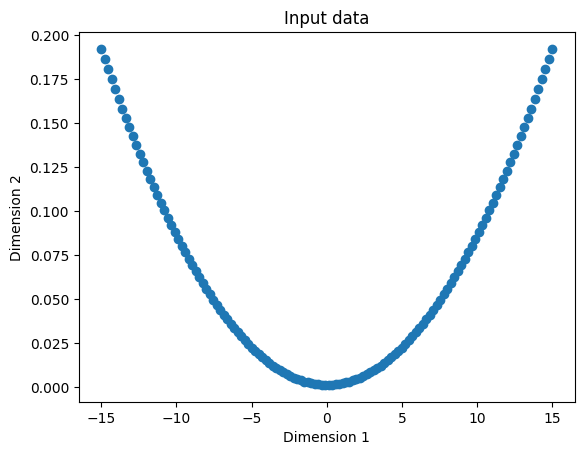

In [15]:
# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [16]:
# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [17]:
# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [18]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 4.381687070049701;
Epoch: 200; Error: 1.091062344594285;
Epoch: 300; Error: 0.6214921519830021;
Epoch: 400; Error: 0.08855739498221865;
Epoch: 500; Error: 0.2441036137257172;
Epoch: 600; Error: 0.16068818858578654;
Epoch: 700; Error: 0.09923172858427673;
Epoch: 800; Error: 0.08023456679136777;
Epoch: 900; Error: 0.04804129208039517;
Epoch: 1000; Error: 0.06008532842565291;
Epoch: 1100; Error: 0.06634619719543206;
Epoch: 1200; Error: 0.06585545463755331;
Epoch: 1300; Error: 0.07341700111544863;
Epoch: 1400; Error: 0.06708992401062355;
Epoch: 1500; Error: 0.06746164144348471;
Epoch: 1600; Error: 0.057624484693298596;
Epoch: 1700; Error: 0.03827290963905643;
Epoch: 1800; Error: 0.019514226773012344;
Epoch: 1900; Error: 0.01529760029987946;
Epoch: 2000; Error: 0.03875417844863628;
The maximum number of train epochs is reached


In [19]:
# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

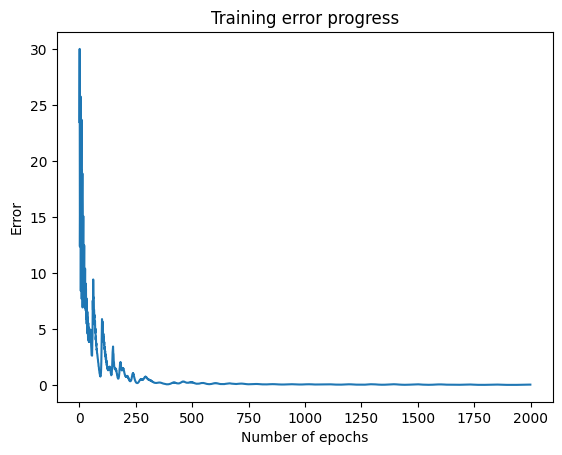

In [20]:
# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')


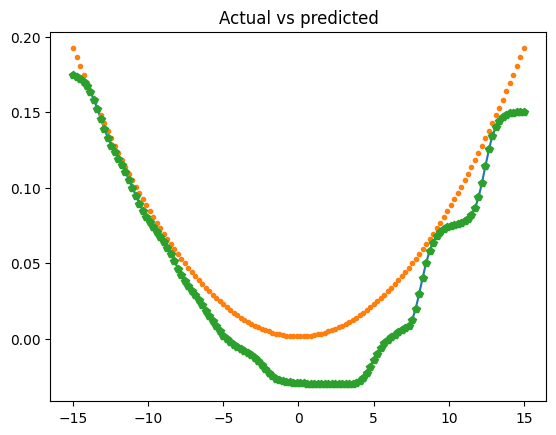

In [21]:
# Plot the output
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')
plt.show()